In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

df = pd.read_csv('dataset.csv')

In [3]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [3]:
df = df.dropna()

In [5]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Составим график зависимости Популярности от энергичности песни

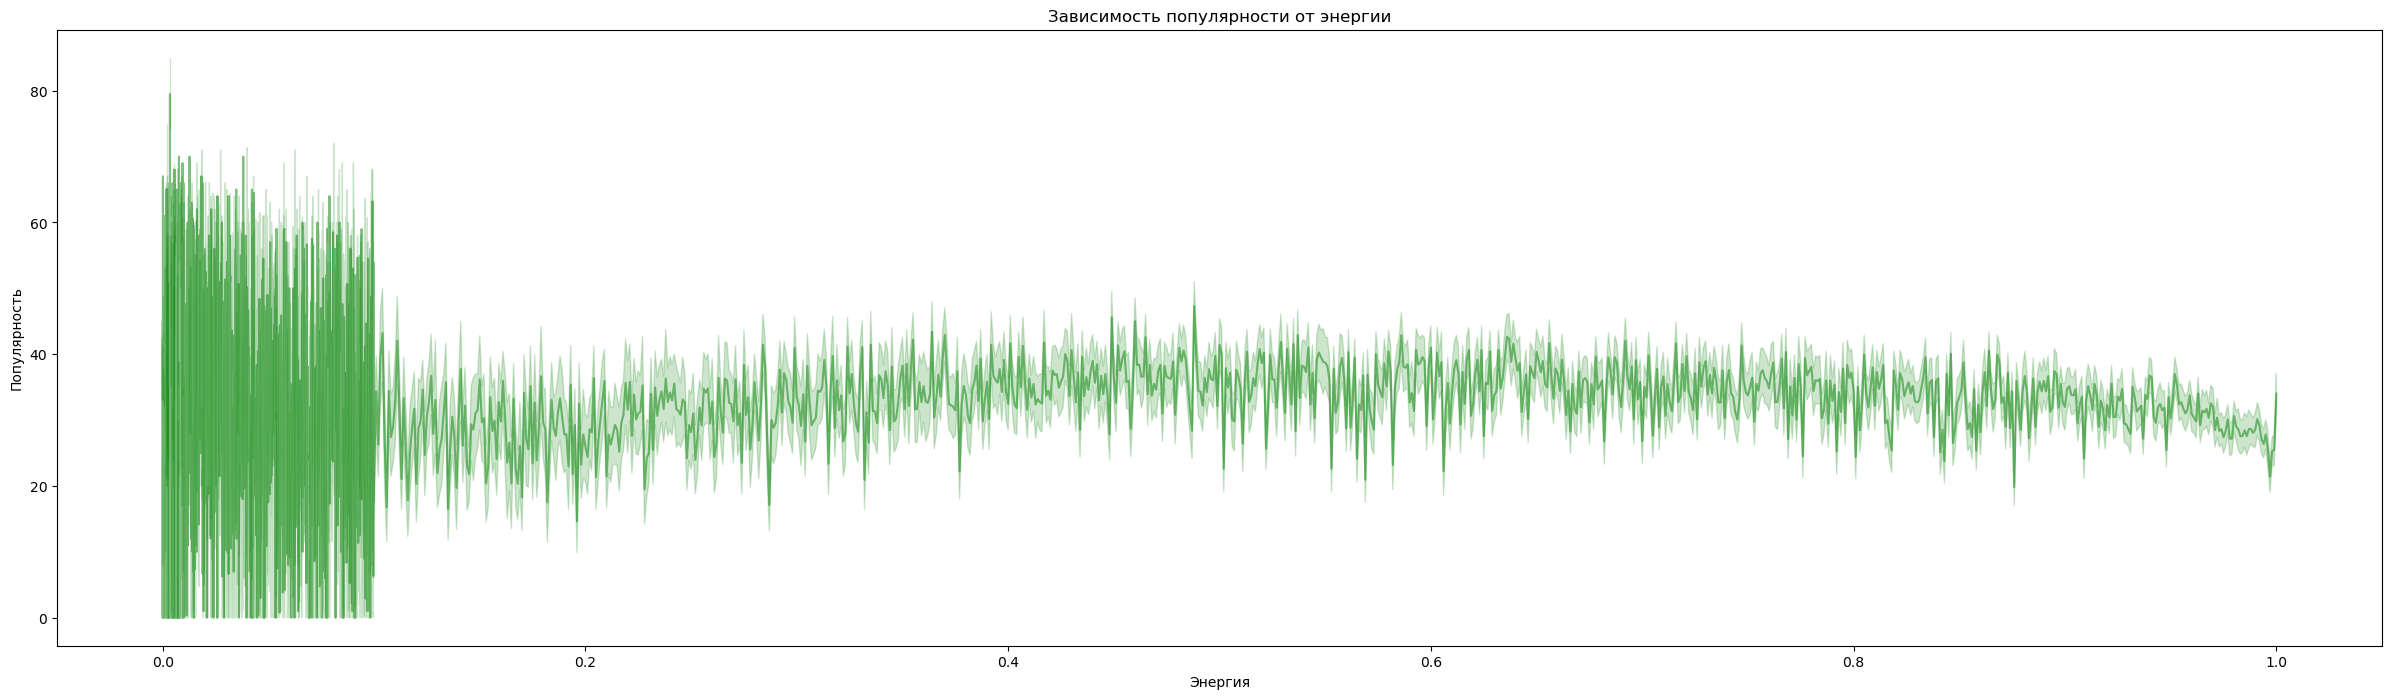

In [29]:
plt.figure(figsize=(30, 8))
sns.lineplot(x='energy', y='popularity', data=df, color='green', alpha=0.5)
plt.title('Зависимость популярности от энергии')
plt.xlabel('Энергия')
plt.ylabel('Популярность')
plt.show()

Как мы видим на этом графике энергичность не значит высокая популярность, у тех песен что имеют маленькую энергичность, те могут быть более популярными, но это лотерея, так как всё таки чем юольше энергичность тем меньше шанса получить не плохой уровень популярности песни. Зафиксируем

Далее составим график зависимости Популярности от танцевальности песни

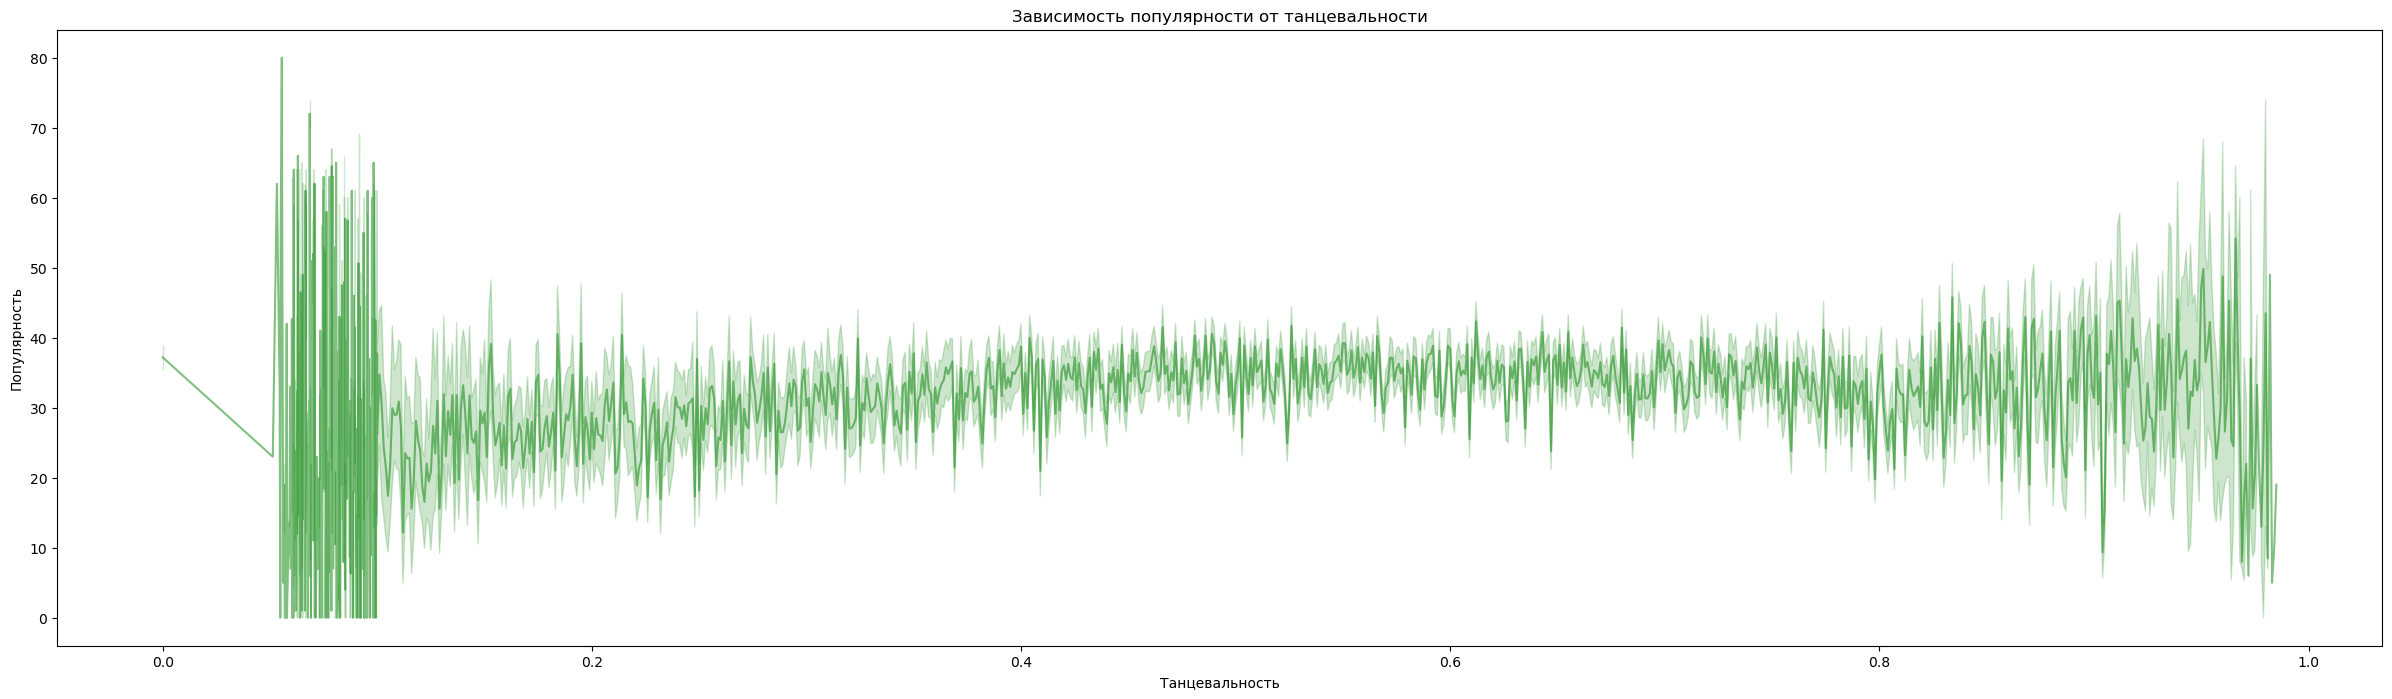

In [45]:
plt.figure(figsize=(30, 8))
sns.lineplot(x='danceability', y='popularity', data=df, color='green', alpha=0.5)
plt.title('Зависимость популярности от танцевальности')
plt.xlabel('Танцевальность')
plt.ylabel('Популярность')
plt.show()

Как мы видим на этом графике ситуация с маленько танцевальномтью такая же как и с маленькой энергичностью, но заметим что при высокой танцевальности песня может стать очень популярной а между уровнь популярности колеблется в уровне среднего значения. Зафиксируем

Далее составим график зависимости Популярности от громкости песни

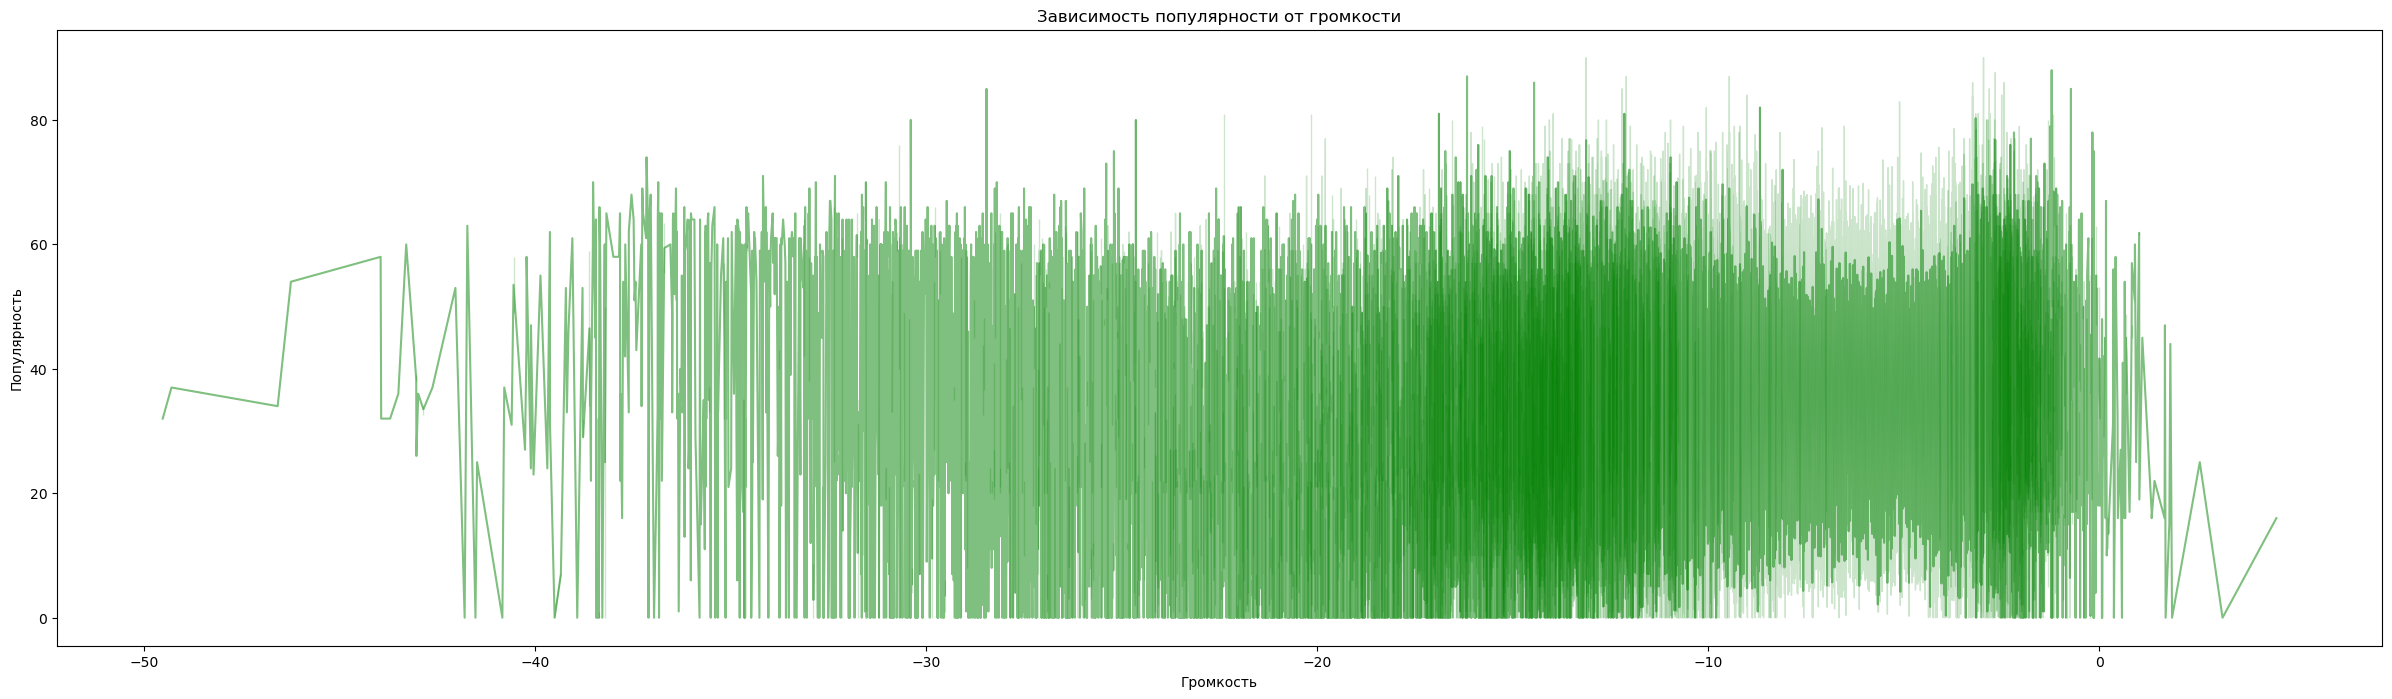

In [51]:
plt.figure(figsize=(30, 8))
sns.lineplot(x='loudness', y='popularity', data=df, color='green', alpha=0.5)
plt.title('Зависимость популярности от громкости')
plt.xlabel('Громкость')
plt.ylabel('Популярность')
plt.show()

Как мы видим на графике что чёткой зависимости нет песня может быть как популярной так и нет. Фиксируем

Далее составим график зависимости Популярности от инструментальности песни

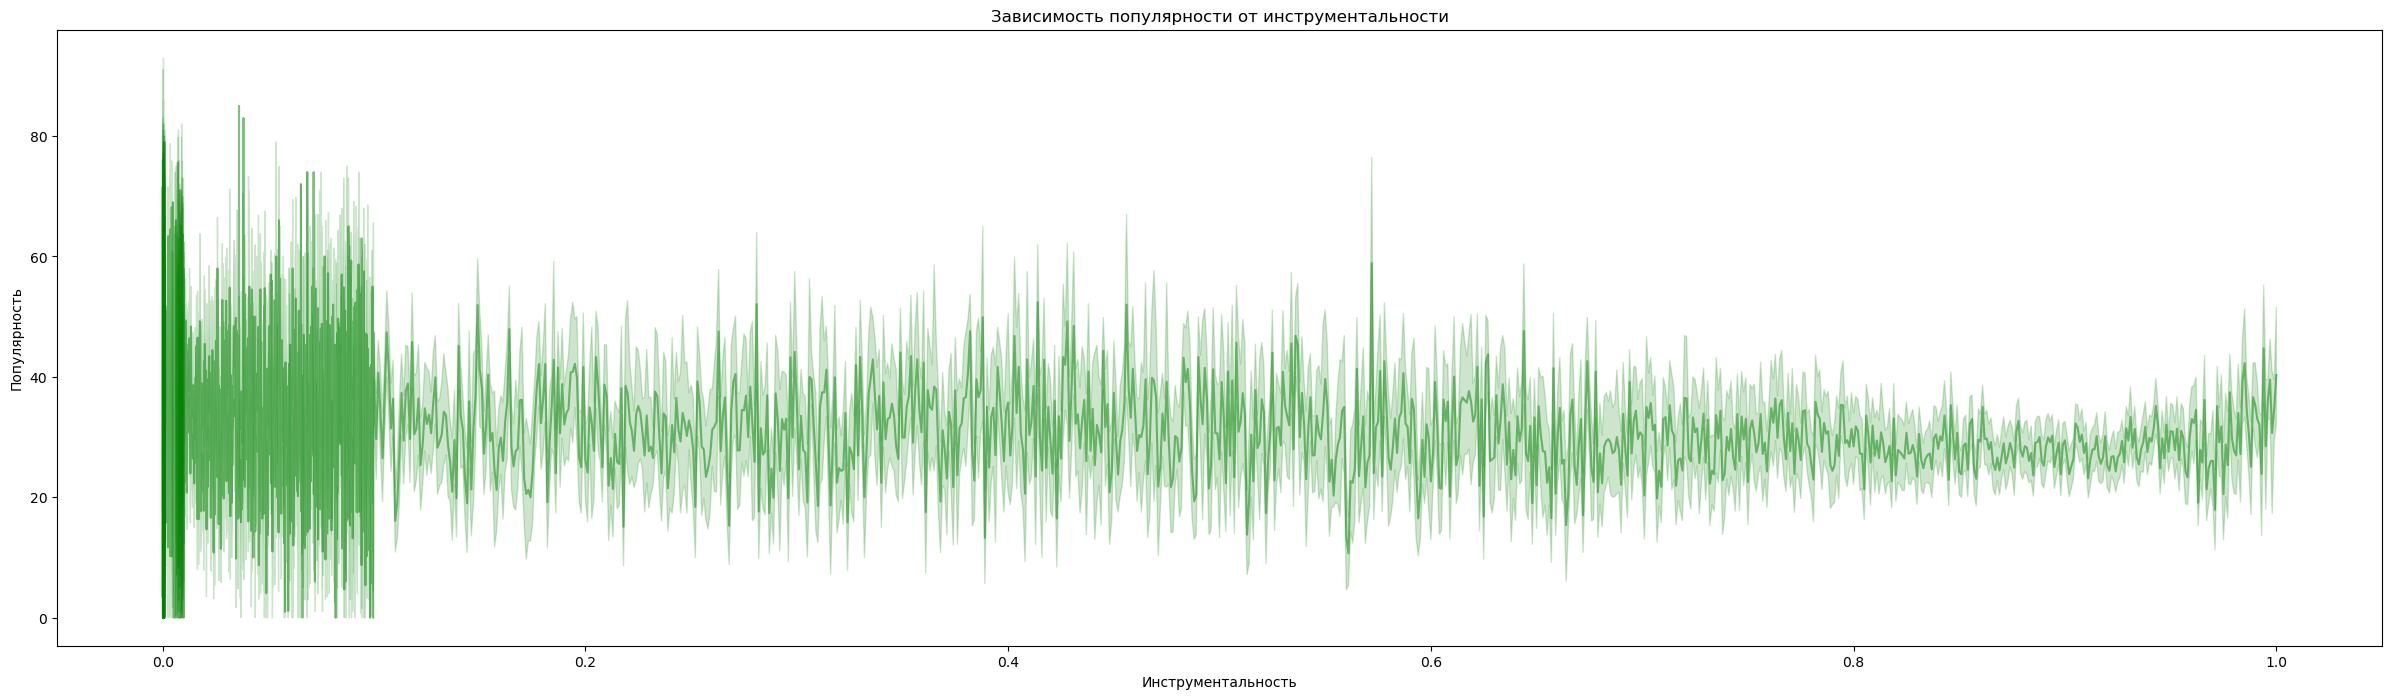

In [59]:
plt.figure(figsize=(30, 8))
sns.lineplot(x='instrumentalness', y='popularity', data=df, color='green', alpha=0.5)
plt.title('Зависимость популярности от инструментальности')
plt.xlabel('Инструментальность')
plt.ylabel('Популярность')
plt.show()

Как мы видим на графике ситуация в начале как у энергичности и танцевальности а далее колеблется по ходу нарастания уровня инструментальности, но не доходит до нуля и заслуживают популярность. Фиксируем

Далее составим график зависимости Популярности от темпа песни

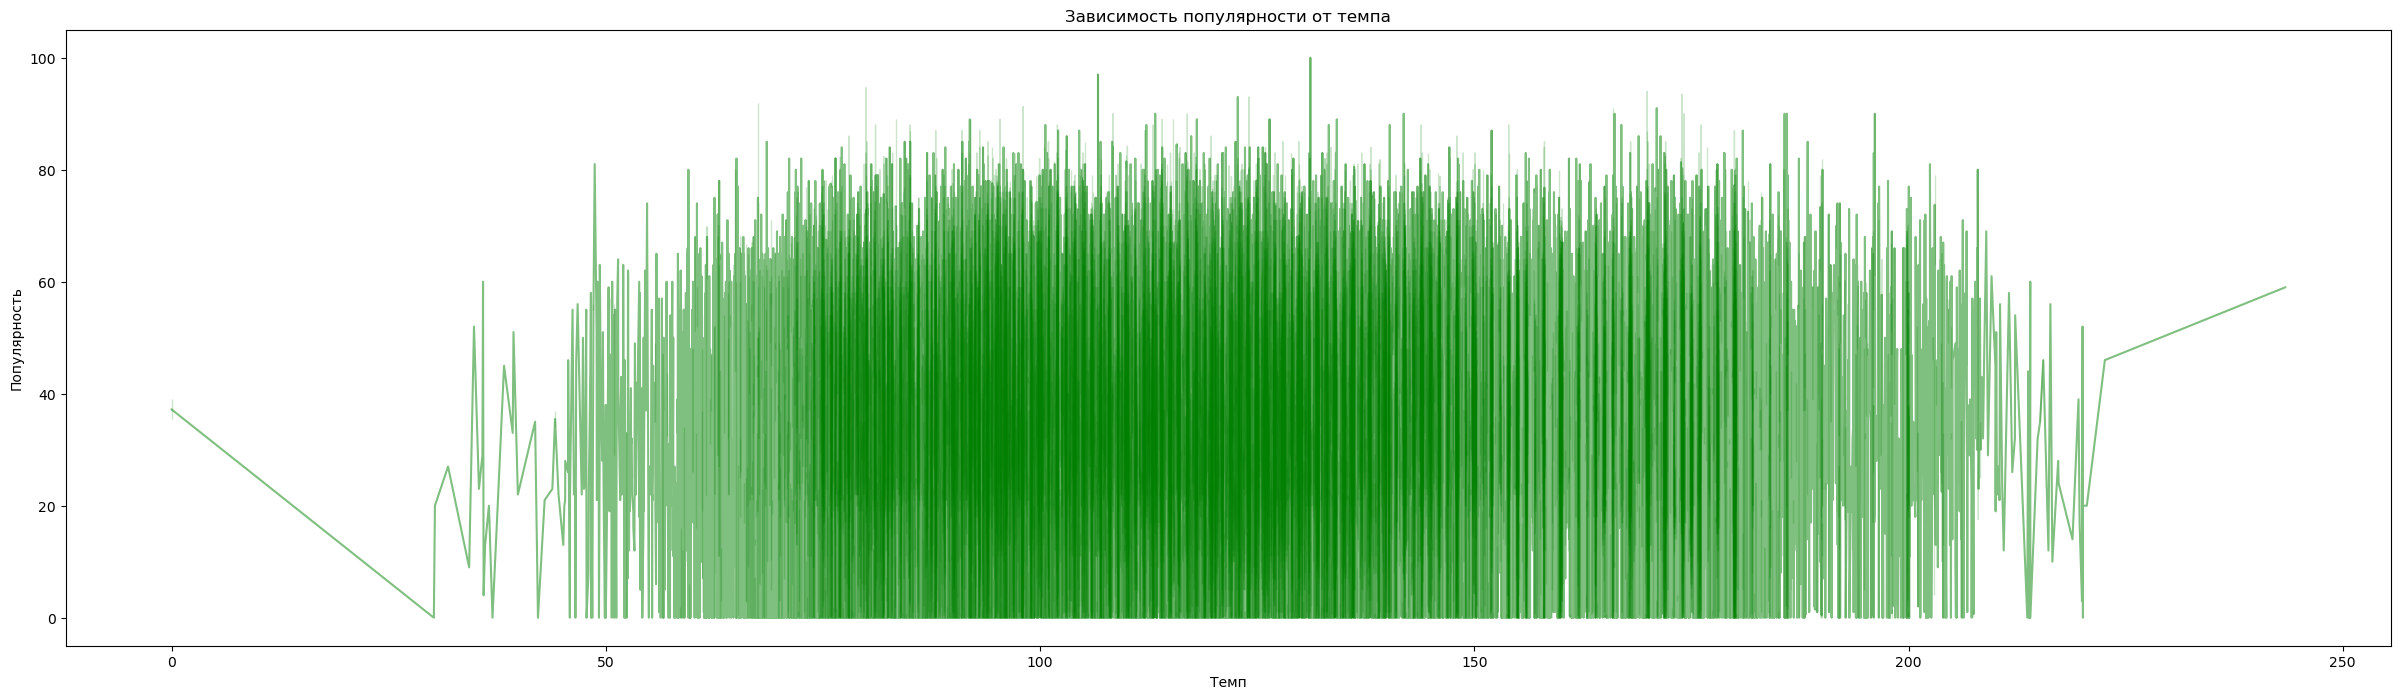

In [60]:
plt.figure(figsize=(30, 8))
sns.lineplot(x='tempo', y='popularity', data=df, color='green', alpha=0.5)
plt.title('Зависимость популярности от темпа')
plt.xlabel('Темп')
plt.ylabel('Популярность')
plt.show()

Как мы видим на графике как и с громкостью чёткой зависимости нет. Фиксируем

Далее составим график зависимости Популярности от пения в песне

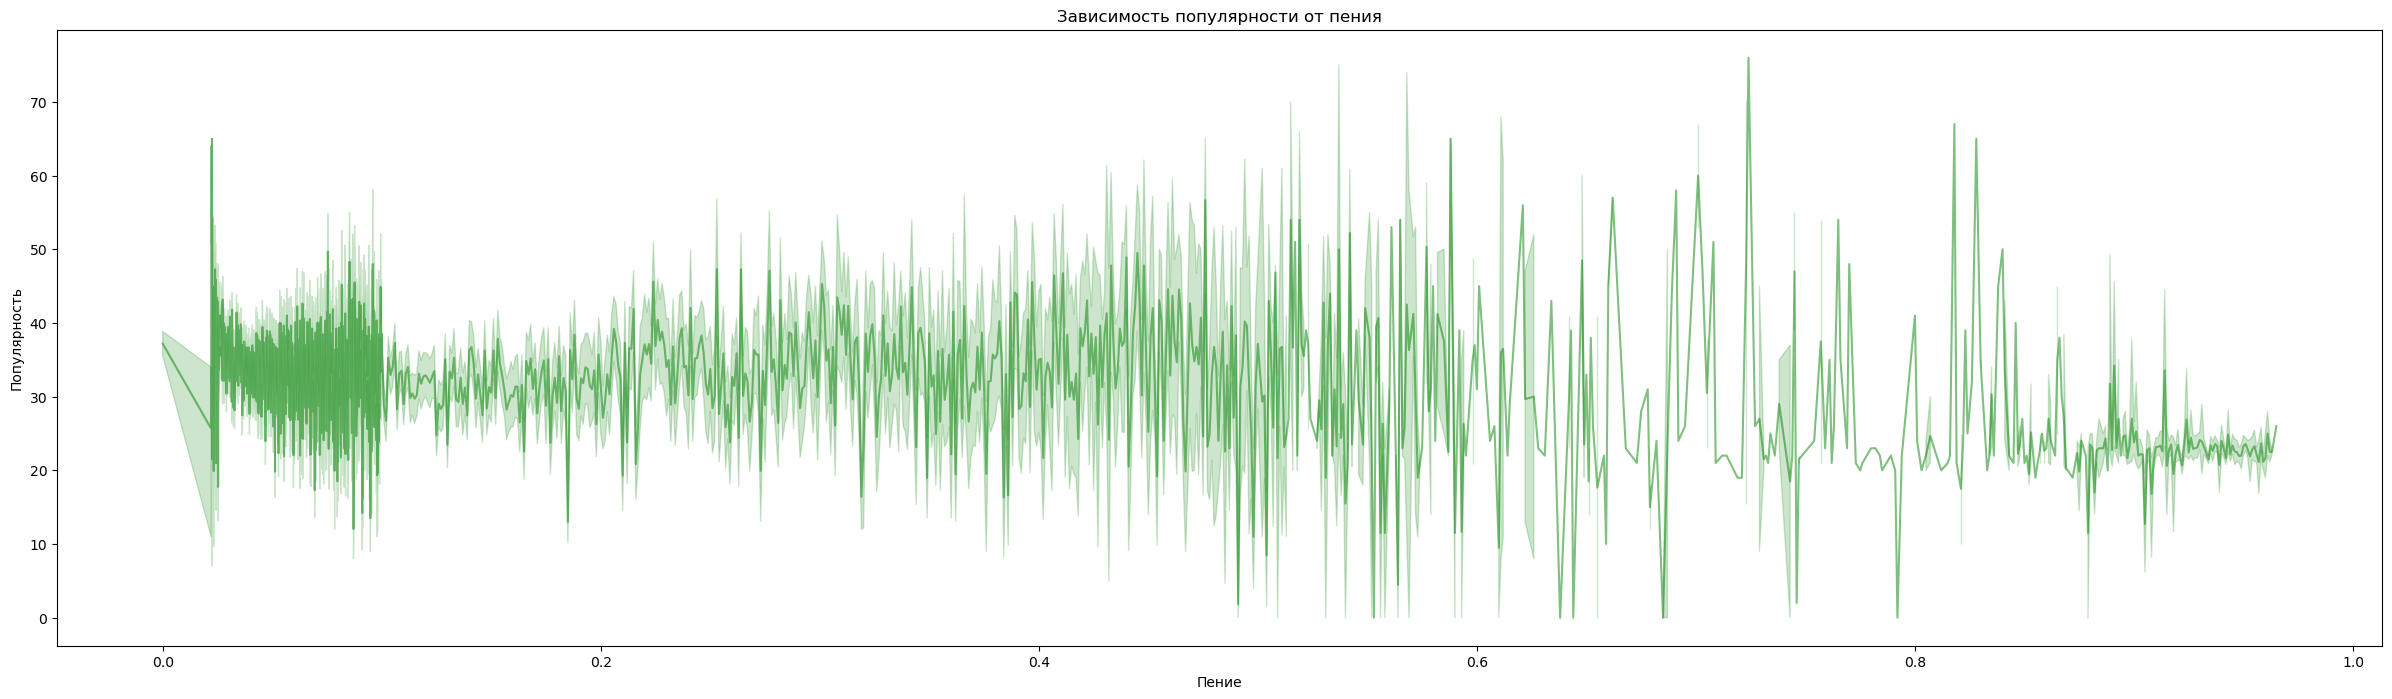

In [61]:
plt.figure(figsize=(30, 8))
sns.lineplot(x='speechiness', y='popularity', data=df, color='green', alpha=0.5)
plt.title('Зависимость популярности от пения')
plt.xlabel('Пение')
plt.ylabel('Популярность')
plt.show()

Как мы видим на графике уровень пение влияет на популярность песни ибо чем лучше пение, тем больше шанс получить популярность песне, нежели с низким уровнем пения

Переведём категориальные данные в числовые для улучшения обучения модели

In [5]:
from sklearn.preprocessing import LabelEncoder
categorial_cols = df.select_dtypes(include=['object']).columns
label_encoders={}
for col in categorial_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,62845,10357,8100,11741,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,1,55667,3287,14796,22528,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,2,19766,12397,39162,60774,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,3,77941,14839,8580,9580,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,4,68241,5255,16899,25689,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,25198,22486,66,53329,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113
113996,113996,19583,22486,66,65090,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113
113997,113997,80126,4952,5028,38207,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113
113998,113998,30455,18534,7238,21507,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113


Удалим поля исходя из результата анализа графиков и здравого смысла

In [9]:
df = df.drop(['Unnamed: 0', 'loudness', 'tempo', 'track_id'], axis=1)

In [17]:
df

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,track_genre
0,10357,8100,11741,73,230666,False,0.676,0.4610,1,0,0.1430,0.0322,0.000001,0.3580,0.7150,4,0
1,3287,14796,22528,55,149610,False,0.420,0.1660,1,1,0.0763,0.9240,0.000006,0.1010,0.2670,4,0
2,12397,39162,60774,57,210826,False,0.438,0.3590,0,1,0.0557,0.2100,0.000000,0.1170,0.1200,4,0
3,14839,8580,9580,71,201933,False,0.266,0.0596,0,1,0.0363,0.9050,0.000071,0.1320,0.1430,3,0
4,5255,16899,25689,82,198853,False,0.618,0.4430,2,1,0.0526,0.4690,0.000000,0.0829,0.1670,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,384999,False,0.172,0.2350,5,1,0.0422,0.6400,0.928000,0.0863,0.0339,5,113
113996,22486,66,65090,22,385000,False,0.174,0.1170,0,0,0.0401,0.9940,0.976000,0.1050,0.0350,4,113
113997,4952,5028,38207,22,271466,False,0.629,0.3290,0,0,0.0420,0.8670,0.000000,0.0839,0.7430,4,113
113998,18534,7238,21507,41,283893,False,0.587,0.5060,7,1,0.0297,0.3810,0.000000,0.2700,0.4130,4,113


Создадим матрицу корреляции признаков

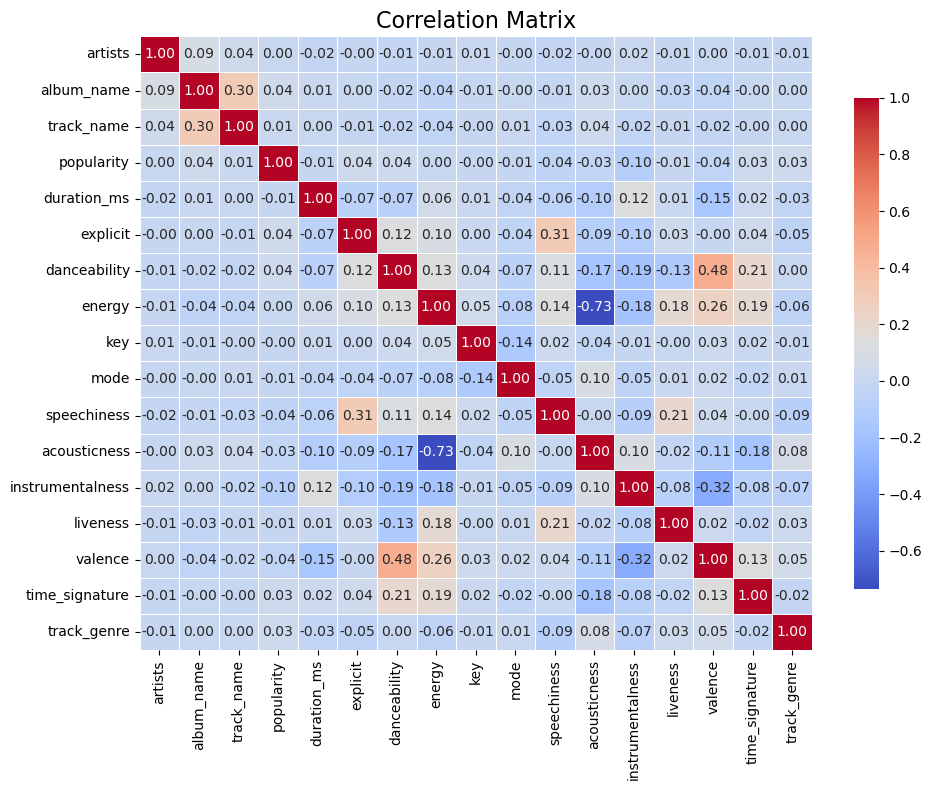

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Размер фигуры
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()  # Убирает пустые поля
plt.show()

Проанализировав матрицу корреляции добавим новые признаки и составим новую матрицу корреляции

In [11]:
# Создание новых признаков
df['dance_energy_ratio'] = df['danceability'] / (df['energy'] + 1e-6)
df['acoustic_energy'] = df['acousticness'] * df['energy']
df['mood_weight'] = df['valence'] * df['energy']
df['speech_explicit_ratio'] = df['speechiness'] * df['explicit']

# Преобразование продолжительности в минуты
df['duration_min'] = df['duration_ms'] / 60000

In [23]:
df

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,mode,...,instrumentalness,liveness,valence,time_signature,track_genre,dance_energy_ratio,acoustic_energy,mood_weight,speech_explicit_ratio,duration_min
0,10357,8100,11741,73,230666,False,0.676,0.4610,1,0,...,0.000001,0.3580,0.7150,4,0,1.466374,0.014844,0.329615,0.0,3.844433
1,3287,14796,22528,55,149610,False,0.420,0.1660,1,1,...,0.000006,0.1010,0.2670,4,0,2.530105,0.153384,0.044322,0.0,2.493500
2,12397,39162,60774,57,210826,False,0.438,0.3590,0,1,...,0.000000,0.1170,0.1200,4,0,1.220052,0.075390,0.043080,0.0,3.513767
3,14839,8580,9580,71,201933,False,0.266,0.0596,0,1,...,0.000071,0.1320,0.1430,3,0,4.463012,0.053938,0.008523,0.0,3.365550
4,5255,16899,25689,82,198853,False,0.618,0.4430,2,1,...,0.000000,0.0829,0.1670,4,0,1.395031,0.207767,0.073981,0.0,3.314217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,384999,False,0.172,0.2350,5,1,...,0.928000,0.0863,0.0339,5,113,0.731912,0.150400,0.007966,0.0,6.416650
113996,22486,66,65090,22,385000,False,0.174,0.1170,0,0,...,0.976000,0.1050,0.0350,4,113,1.487167,0.116298,0.004095,0.0,6.416667
113997,4952,5028,38207,22,271466,False,0.629,0.3290,0,0,...,0.000000,0.0839,0.7430,4,113,1.911848,0.285243,0.244447,0.0,4.524433
113998,18534,7238,21507,41,283893,False,0.587,0.5060,7,1,...,0.000000,0.2700,0.4130,4,113,1.160077,0.192786,0.208978,0.0,4.731550


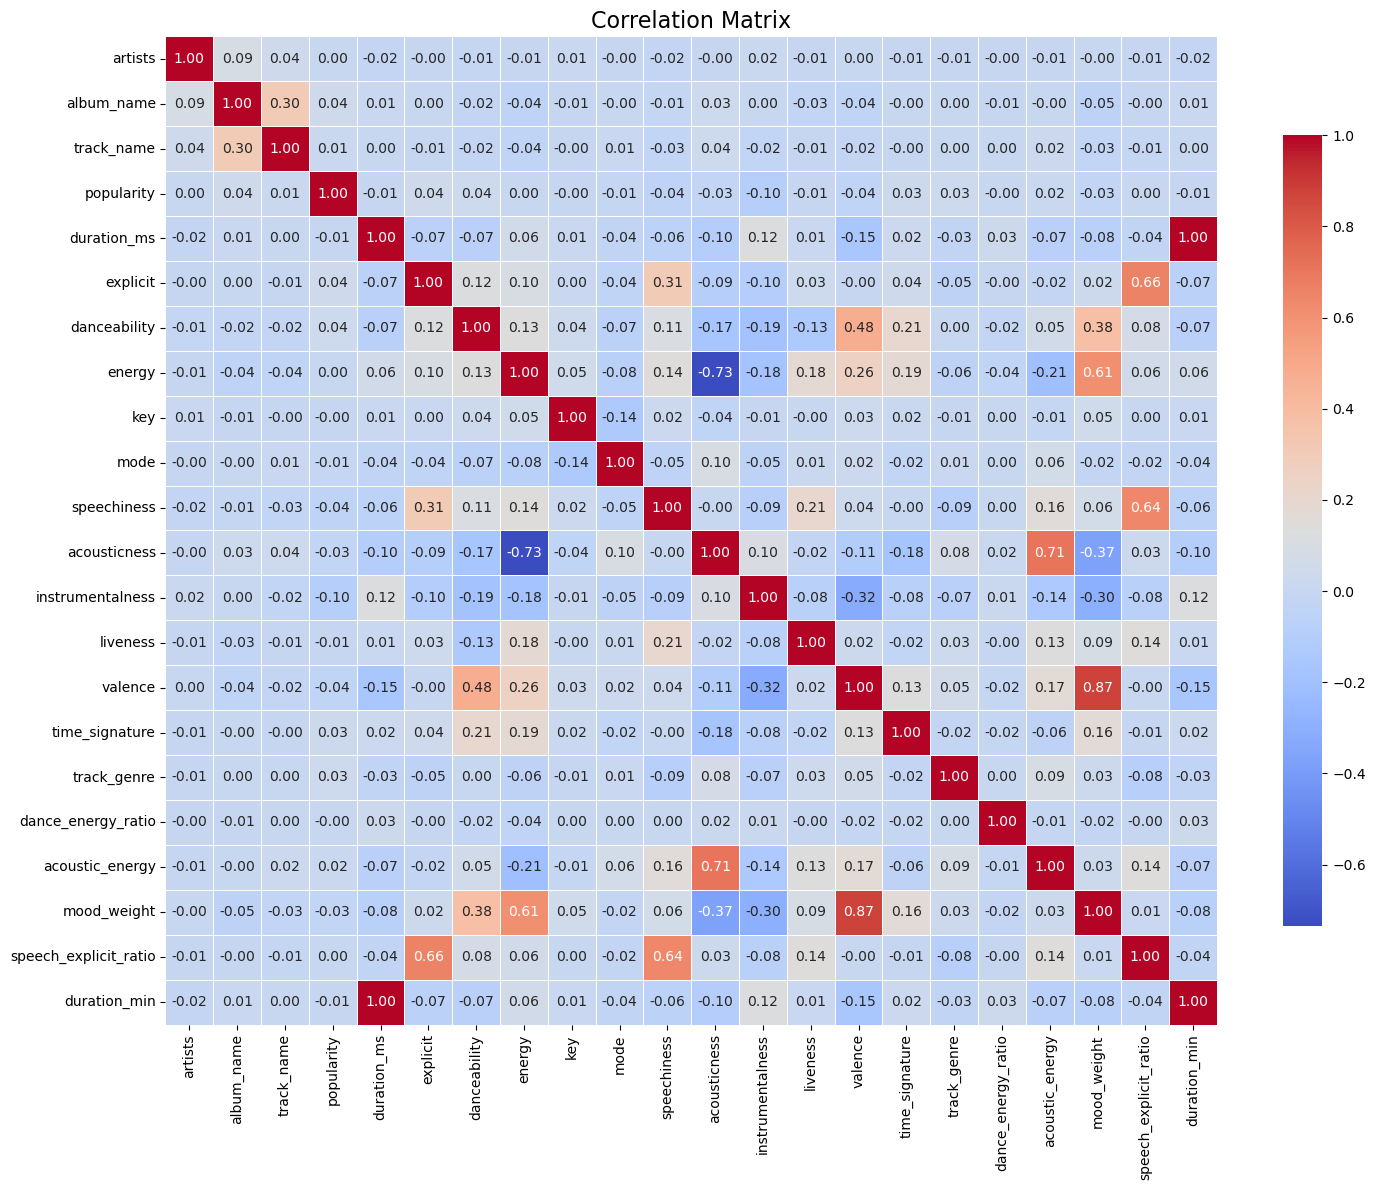

In [25]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 12))  # Размер фигуры
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()  # Убирает пустые поля
plt.show()

Проанализировав новую матрицу видим что новые признаки хоть и не сильно, но лучше влияет на popularity

In [13]:
X = df.drop(columns=['popularity'])
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
import tensorflow as tf
from tensorflow import keras

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/100


C:\Users\alexr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 645us/step - loss: 625.0770 - val_loss: 474.7636
Epoch 2/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - loss: 471.0456 - val_loss: 471.3459
Epoch 3/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - loss: 459.1666 - val_loss: 459.3057
Epoch 4/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - loss: 448.8728 - val_loss: 455.5707
Epoch 5/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - loss: 447.1071 - val_loss: 454.1252
Epoch 6/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - loss: 440.7598 - val_loss: 447.7426
Epoch 7/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - loss: 436.2903 - val_loss: 444.2899
Epoch 8/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - loss: 436.7960 - val_loss: 448.5752
Epoch 9/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - loss: 431.8095 - val_loss: 439.2493
Epoch 10/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - loss: 423.0567 - val_loss: 438.0745
Epoch 11/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - l

In [27]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
rmse= mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step
MAE: 15.641986281213008
RMSE: 19.707212555539886
MAPE: 1.5360461645386898e+18%


Провёл feature impirtnace где мы видим что аккустичность лучше влияет на popularity, а меньше всего временная сигнатура

PermutationExplainer explainer: 22801it [13:53, 27.02it/s]                                                             


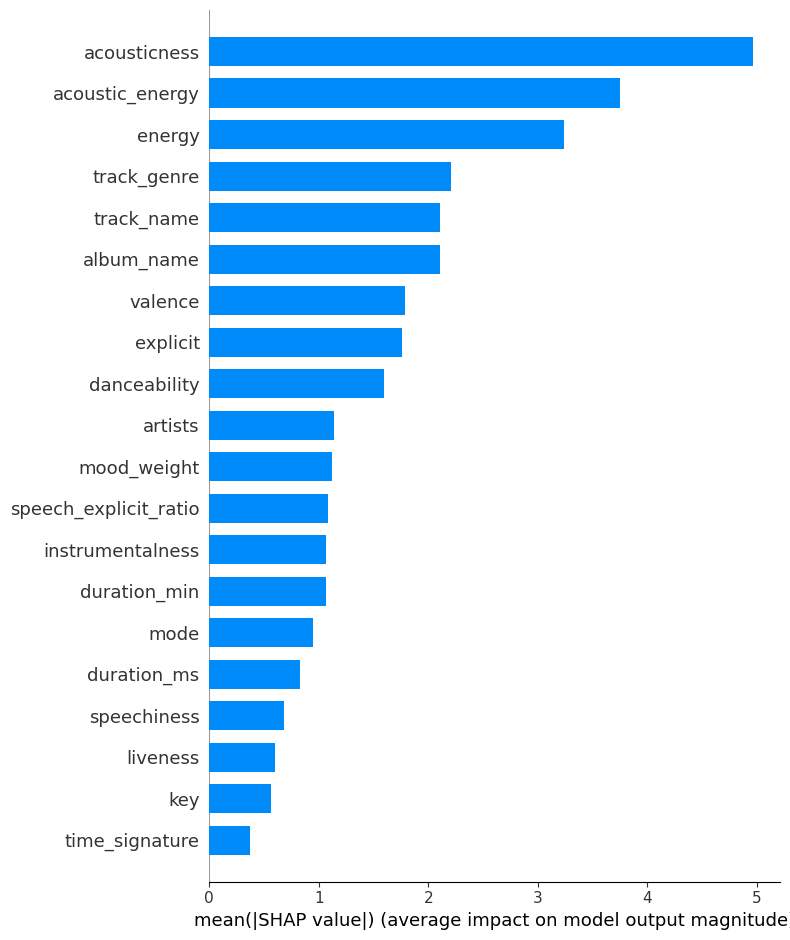

In [31]:
import shap
import matplotlib.pyplot

# Создаем объяснитель SHAP на основе вашей модели
explainer = shap.Explainer(model, X_train)

# Рассчитываем значения SHAP для тестового набора данных
shap_values = explainer(X_test)

# Строим summary-плот
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")



In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/200


C:\Users\alexr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 622.8091 - val_loss: 476.0677
Epoch 2/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 483.1407 - val_loss: 460.9326
Epoch 3/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 475.2168 - val_loss: 455.3076
Epoch 4/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 468.0782 - val_loss: 453.4459
Epoch 5/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 464.8722 - val_loss: 446.0849
Epoch 6/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 458.4444 - val_loss: 442.7144
Epoch 7/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 452.2186 - val_loss: 434.1129
Epoch 8/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - loss: 448.3060 - val_loss: 432.8198
Epoch 9/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 443.1128 - val_loss: 431.1721
Epoch 10/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 439.0905 - val_loss: 427.6967
Epoch 11/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 434.5140 - val_

In [45]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
rmse= mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
MAE: 14.94765095681475
RMSE: 18.85533651269845
MAPE: 1.493296102969378e+18%


Обучим модель из семейства линейных

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Создание и обучение модели
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Оценка качества
y_pred = linear_model.predict(X_test)
loss = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
rmse= loss ** 0.5
print(f'Mean Squared Error/Loss (Linear Regression): {loss}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

Mean Squared Error/Loss (Linear Regression): 481.64075637764296
MAE: 18.24221714919534
RMSE: 21.946315325758967
MAPE: 2.1308760042152988e+18%


In [ ]:
Обучим модель из семейства деревьев

In [31]:
from sklearn.tree import DecisionTreeRegressor

# Создание и обучение модели
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_model.fit(X_train, y_train)

# Оценка качества
y_pred = tree_model.predict(X_test)
loss = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
rmse= loss ** 0.5
print(f'Mean Squared Error/loss (Decision Tree): {loss}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

Mean Squared Error/loss (Decision Tree): 411.7737982808642
MAE: 15.97481879863471
RMSE: 20.292210285744236
MAPE: 1.6334842206806764e+18%


Обучим модель из семейства градиентного бустинга

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

# Создание и обучение модели
boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
boosting_model.fit(X_train, y_train)

# Оценка качества
y_pred = boosting_model.predict(X_test)
loss = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
rmse= loss ** 0.5
print(f'Mean Squared Error/loss (Gradient Boosting): {loss}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

Mean Squared Error/loss (Gradient Boosting): 385.79076490084896
MAE: 15.934019196548737
RMSE: 19.641557089519377
MAPE: 1.7837052461007224e+18%


In [51]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.to_numpy()[train_index], y_train.to_numpy()[val_index]

    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    model.fit(X_train_fold, y_train_fold, epochs=200, batch_size=64, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])

    val_loss = model.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(val_loss)
    print(f'Validation Loss for this fold: {val_loss}')

mean_cv_score = np.mean(cv_scores)
print(f'Mean Validation Loss from 5-Fold Cross Validation: {mean_cv_score}')

Epoch 1/200


C:\Users\alexr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 624.5483 - val_loss: 475.6183
Epoch 2/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 484.7292 - val_loss: 463.3916
Epoch 3/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 475.4687 - val_loss: 455.3288
Epoch 4/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 469.0481 - val_loss: 446.9011
Epoch 5/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 467.2878 - val_loss: 438.5576
Epoch 6/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 455.7310 - val_loss: 433.9675
Epoch 7/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 444.8262 - val_loss: 428.1130
Epoch 8/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 440.1962 - val_loss: 429.5708
Epoch 9/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 440.7179 - val_loss: 430.3543
Epoch 10/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 437.8495 - val_loss: 422.0054
Epoch 11/200
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 435.0143 - val_lo

По результатам 5-фолдовой кросс-валидации, модель демонстрирует стабильные потери на валидации, что указывает на её хорошую способность обобщения. Потери варьируются от 320.83 до 366.91, с наибольшим значением в первом фолде, что может свидетельствовать о незначительных различиях в сложности данных между фолдами. Для остальных фолдов потери находятся в диапазоне 320–329, что является более устойчивым результатом.

Среднее значение потерь на валидации составило 333.39, что даёт общее представление о производительности модели. Относительно низкие колебания потерь между фолдами указывают на высокую стабильность модели, что свидетельствует о её потенциале для использования в поставленной задаче.

Полученные результаты подтверждают, что модель уже демонстрирует хорошую производительность, однако дальнейшие улучшения, такие как тонкая настройка гиперпараметров или увеличение объёма данных, могут дополнительно повысить её точность.